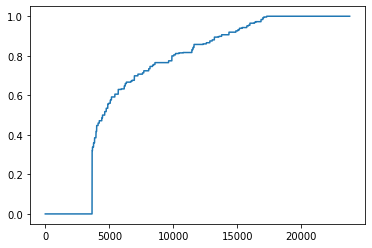

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

import numpy as np
import pandas as pd
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/geun/KoreanNewsChronicle/Topic_Abstract/Data/2019.csv',encoding='utf-8')

# 결측지 행 제거 후 topics에 있는 것을 추출
s = df.dropna()
news_topic = s['topics'].tolist()

# # CountVectrizer로 토큰화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_topic)

X = normalize(X)

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [11]:
m = DBSCAN(eps=0.45, min_samples = 10)

m.fit(X)

labels = m.labels_

s['labels'] = labels

hot_topic_index = Counter(s['labels']).most_common()
hot_topic = dict(hot_topic_index)

print(hot_topic)

{-1: 22183, 2: 379, 9: 70, 21: 57, 5: 35, 28: 35, 59: 34, 43: 26, 27: 25, 67: 25, 22: 24, 72: 23, 25: 21, 73: 20, 58: 19, 62: 17, 85: 17, 112: 17, 12: 16, 36: 16, 39: 15, 0: 13, 50: 13, 41: 13, 42: 13, 92: 13, 96: 13, 107: 13, 7: 12, 33: 12, 98: 12, 13: 11, 66: 11, 120: 11, 4: 10, 18: 10, 23: 10, 3: 9, 29: 9, 40: 9, 71: 9, 91: 9, 95: 9, 104: 9, 19: 8, 57: 8, 70: 8, 114: 8, 6: 7, 11: 7, 31: 7, 37: 7, 45: 7, 79: 7, 89: 7, 110: 7, 116: 7, 20: 6, 34: 6, 35: 6, 46: 6, 52: 6, 51: 6, 55: 6, 65: 6, 77: 6, 78: 6, 84: 6, 93: 6, 105: 6, 102: 6, 106: 6, 108: 6, 1: 5, 8: 5, 10: 5, 15: 5, 14: 5, 16: 5, 17: 5, 24: 5, 26: 5, 30: 5, 32: 5, 44: 5, 38: 5, 54: 5, 47: 5, 64: 5, 48: 5, 49: 5, 53: 5, 56: 5, 60: 5, 61: 5, 63: 5, 74: 5, 68: 5, 69: 5, 80: 5, 76: 5, 75: 5, 121: 5, 83: 5, 81: 5, 82: 5, 87: 5, 86: 5, 88: 5, 90: 5, 115: 5, 94: 5, 99: 5, 97: 5, 101: 5, 100: 5, 103: 5, 109: 5, 111: 5, 113: 5, 118: 5, 117: 5, 119: 5}


In [12]:
index = []
for row in s['labels']:
    index.append(hot_topic[row])

s['cnt'] = index
s.sort_values(by='cnt', ascending=False).to_csv('201901_cluster_DBSCAN_10.csv', index=False, header=True,encoding="utf-8-sig")